# Practical Lab 3 - Univariate Linear Regression

`Framing the Problem`

Imagine we’re detectives in the city of DataVille, and we’ve been given a mission! Our task? To unravel the mystery of house prices. We have three clues to help us: the average income of the residents, the total number of people living in the area, and the number of households. By using a tool called univariate linear regression, we’ll see how these clues relate to the price tag on the houses.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

`Getting the Data`

The dataset used in this report can be found [here](https://www.kaggle.com/datasets/camnugent/california-housing-prices). We will load the data into a Pandas DataFrame for analysis.

In [47]:
import pandas as pd

housing = pd.read_csv(r'c:\Users\Satya\Downloads\Compressed\archive_2\housing.csv')


`Exploratory Data Analysis (EDA)`

Think of it like being a treasure hunter, but instead of a map leading to a chest of gold, you have a dataset. Our mission, should you choose to accept it, is to uncover the hidden patterns and secrets within this dataset. You’ll be using your magnifying glass (visual methods) to highlight the key features and summarize what makes this treasure (data) truly unique. 

**Basic Statistics**

In [48]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


`Three Seaborn scatter plots of median house value vs. median income, population and number of households.` 

Text(0.5, 1.0, 'Median House Value vs Median Income')

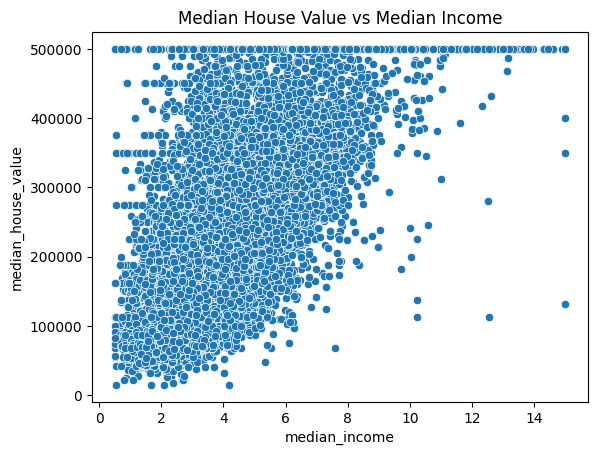

In [49]:
sns.scatterplot(x='median_income', y='median_house_value', data=housing).set_title('Median House Value vs Median Income')

Text(0.5, 1.0, 'Median House Value vs Population')

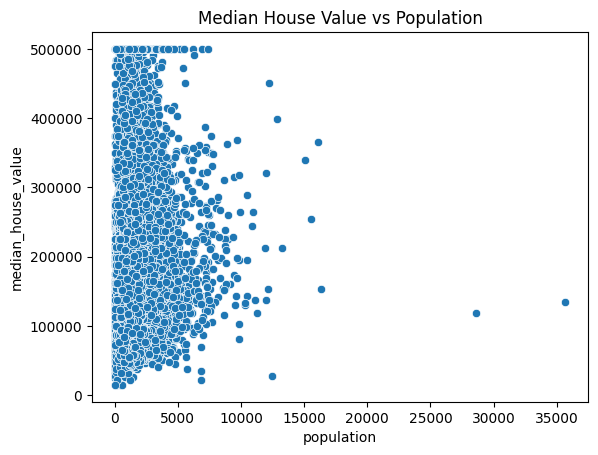

In [50]:
sns.scatterplot(x='population', y='median_house_value', data=housing).set_title('Median House Value vs Population')

Text(0.5, 1.0, 'Median House Value vs Number of Households')

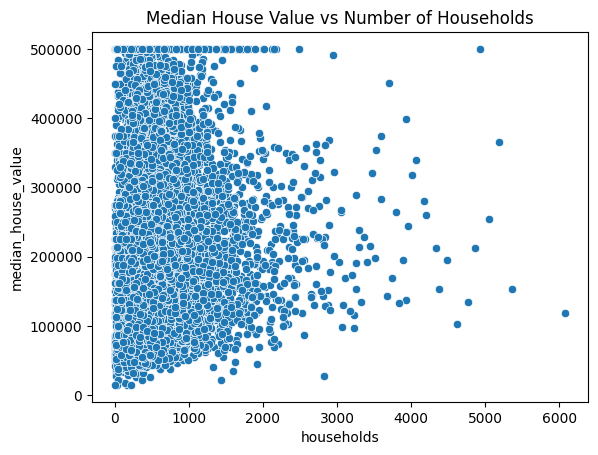

In [51]:
sns.scatterplot(x='households', y='median_house_value', data=housing).set_title('Median House Value vs Number of Households')

`Linear Regression`

Fitting the Models

In [53]:
from sklearn.linear_model import LinearRegression

# median house value vs. median income
model1 = LinearRegression().fit(housing[['median_income']], housing['median_house_value'])

# median house value vs. population
model2 = LinearRegression().fit(housing[['population']], housing['median_house_value'])

# median house value vs. number of households
model3 = LinearRegression().fit(housing[['households']], housing['median_house_value'])


`Model Summary`

Imagine we’re chefs in the kitchen of Data Cuisine, and we’ve just cooked up some delicious models! Now, it’s time for the taste test. We’ll be checking four ingredients in our recipe: the intercept (where our line starts on the graph), the slope (how steep our line is), the Mean Squared Error (how much our predictions differ from the actual values, squared for extra spice), and the Mean Absolute Error (the average difference between our predictions and the actual values).

**Printing coefficients for Model 1 - Median Income and Median House Value**

In [54]:
model = LinearRegression().fit(housing[['median_income']], housing['median_house_value'])
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 45085.5767032679
Coefficients: [41793.8492019]


Plotting the Results

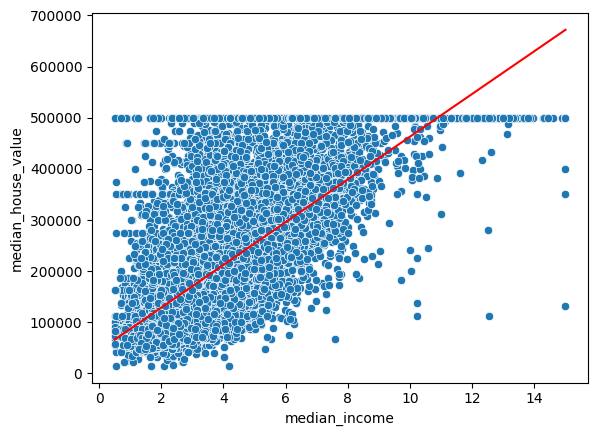

In [55]:
sns.scatterplot(x='median_income', y='median_house_value', data= housing)
sns.lineplot(x='median_income', y=model1.predict(housing[['median_income']]), color='red', data=housing)
plt.show()

Printing the Mean squared error and Mean absolute error

In [56]:
print(f"Mean squared error: {mean_squared_error(housing[['median_house_value']], model1.predict(housing[['median_income']]))}")
print(f"Mean absolute error: {mean_absolute_error(housing[['median_house_value']], model1.predict(housing[['median_income']]))}")


Mean squared error: 7011311502.929527
Mean absolute error: 62625.9337911434


**Print coefficients for Model 2 - Population and Median House Value**

In [57]:
modelx = LinearRegression().fit(housing[['population']], housing['median_house_value'])
print(f"Intercept: {modelx.intercept_}")
print(f"Coefficients: {modelx.coef_}")

Intercept: 210436.26207627333
Coefficients: [-2.51175277]


Plotting the Results

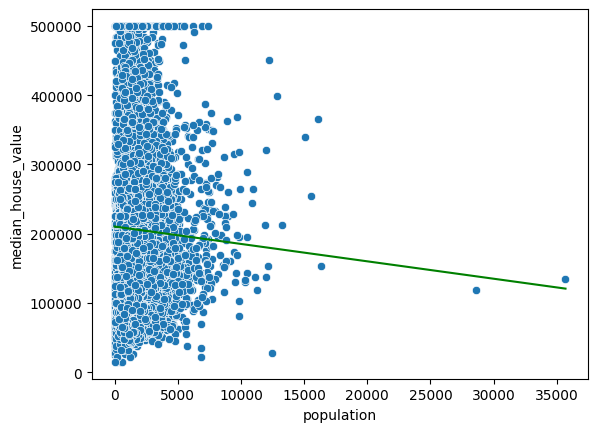

In [58]:
sns.scatterplot(x='population', y='median_house_value', data= housing)
sns.lineplot(x='population', y=model2.predict(housing[['population']]), color='green', data=housing)
plt.show()

Printing the Mean squared error and Mean absolute error

In [59]:
print(f"Mean squared error: {mean_squared_error(housing[['median_house_value']], model2.predict(housing[['population']]))}")
print(f"Mean absolute error: {mean_absolute_error(housing[['median_house_value']], model2.predict(housing[['population']]))}")


Mean squared error: 13307412412.389355
Mean absolute error: 91153.82009473183


**Print coefficients for Model 3 - Households and Median House Value**

In [60]:
modelY = LinearRegression().fit(housing[['households']], housing['median_house_value'])
print(f"Intercept: {modelY.intercept_}")
print(f"Coefficients: {modelY.coef_}")

Intercept: 196928.57716233088
Coefficients: [19.87277516]


Plotting the Results

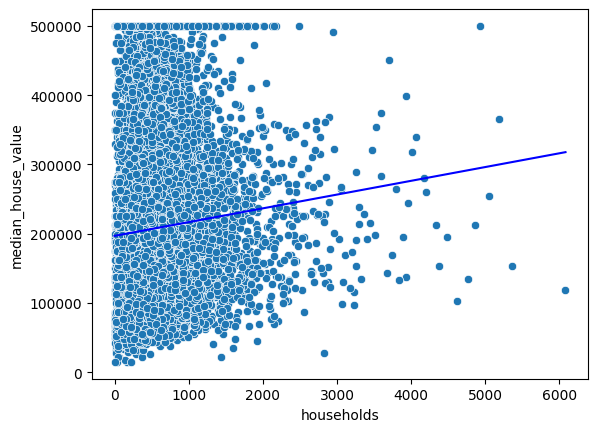

In [61]:
sns.scatterplot(x='households', y='median_house_value', data= housing)
sns.lineplot(x='households', y=model3.predict(housing[['households']]), color='Blue', data=housing)
plt.show()

Printing the Mean squared error and Mean absolute error

In [62]:
print(f"Mean squared error: {mean_squared_error(housing[['median_house_value']], model3.predict(housing[['households']]))}")
print(f"Mean absolute error: {mean_absolute_error(housing[['median_house_value']], model3.predict(housing[['households']]))}")


Mean squared error: 13257776904.728533
Mean absolute error: 90802.74324318448


# `Conclusion about the goodness-of-fit`

The goodness-of-fit of our models varies significantly. 

Model 1, which predicts median house value based on median income, has the lowest MSE and MAE. This suggests that median income is the most predictive of the three variables we considered, and that this model provides the best fit to the data.

Model 2 and Model 3, which predict median house value based on population and number of households respectively, have significantly higher MSE and MAE values. This suggests that these models do not fit the data as well as Model 1. The high error values could be due to outliers, a non-linear relationship between the variables, or other factors.

In conclusion, based on the MSE and MAE values, median income appears to be the most reliable predictor of median house value among the variables we considered. 
